In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

115712


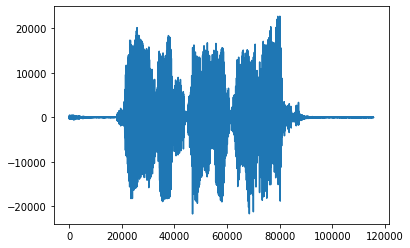

In [4]:
samplerate, data = wavfile.read('Data/microphone-results.wav')

n = np.arange(len(data))

plt.plot(n, data)
print(len(data))

1000


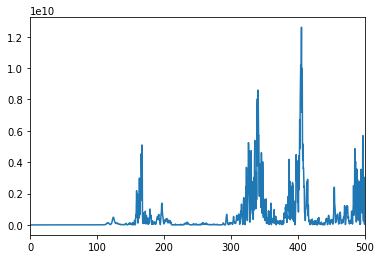

In [29]:
N = len(n)
fhat = np.fft.fft(data, N)
PSD = fhat * np.conj(fhat) / N
freq = (samplerate/N) * n

plt.plot(freq, PSD)

plt.xlim(0, 500)

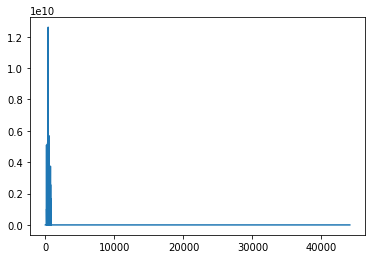

In [63]:
#indices = PSD > (0.10 * (10**10))
indices1 = freq < 20000

PSD_clean = PSD * indices * indices1
fhat_clean = fhat * indices * indices1
f_filt = np.fft.ifft(fhat_clean)


plt.plot(freq, PSD_clean)
#plt.xlim(40000,45000)


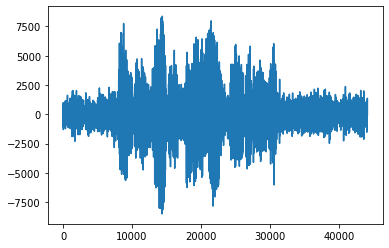

In [64]:
plt.plot(freq, f_filt)

In [65]:
wavfile.write('Data/clean_microphone.wav', 44100, np.int16(f_filt))